In [173]:
%matplotlib inline
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)


In [174]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/Loan_Default.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [175]:
inutili=['ID','year','dtir1']

data=data.drop(inutili,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

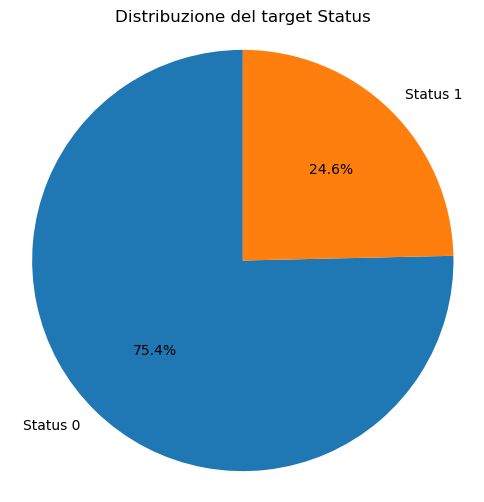

In [176]:
count_status = data['Status'].value_counts()

# Creo il grafico a torta
plt.figure(figsize=(6, 6))  #Dimensioni grafico
plt.pie(count_status, labels=['Status 0', 'Status 1'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione del target Status')  
plt.axis('equal')  # Assicura che il grafico sia un cerchio


plt.show()

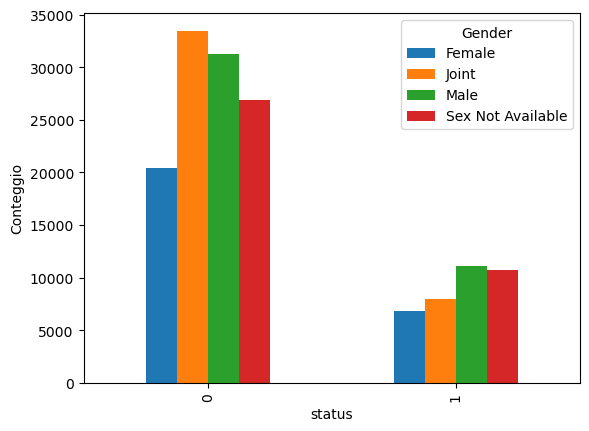

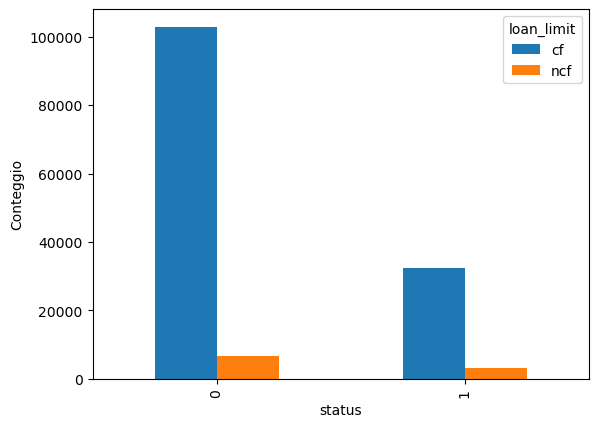

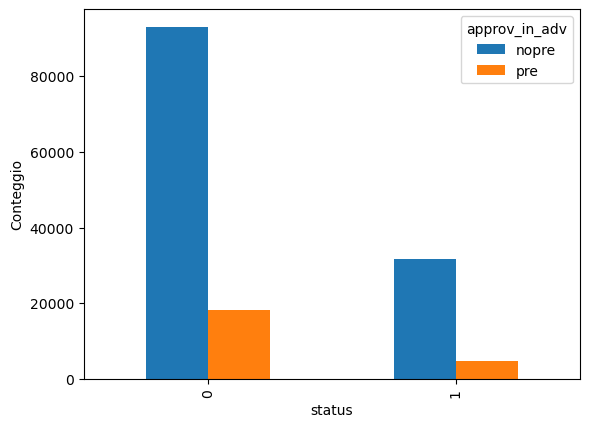

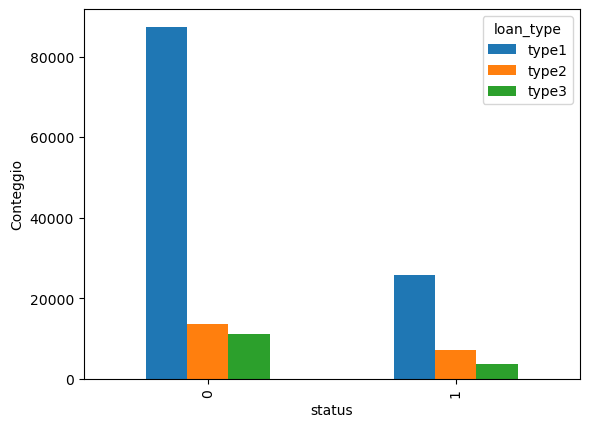

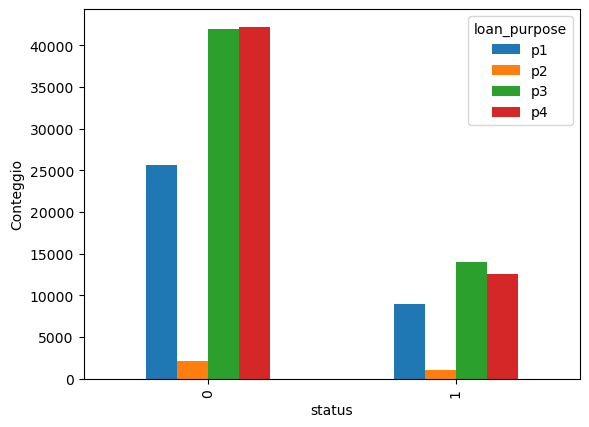

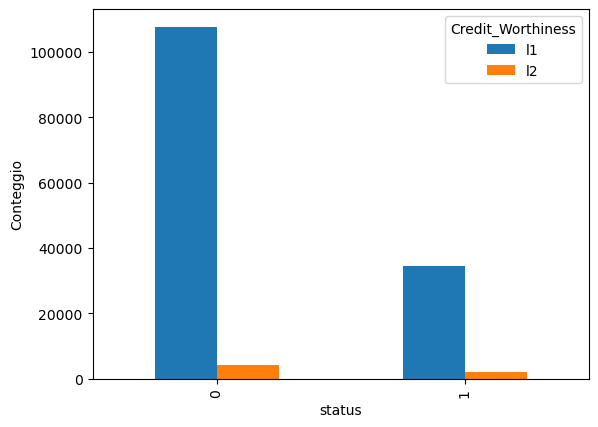

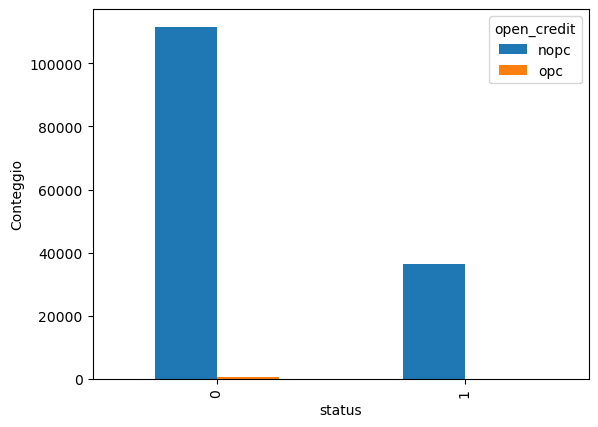

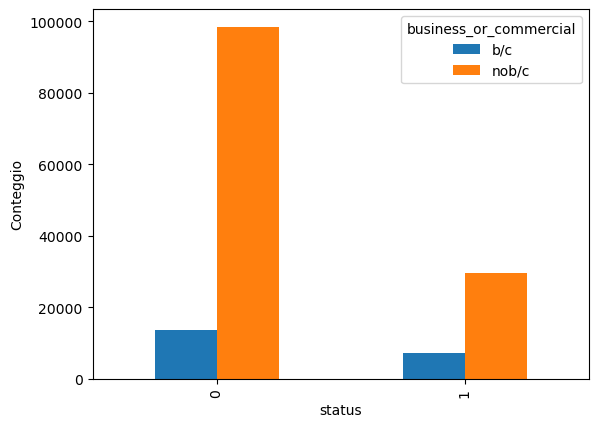

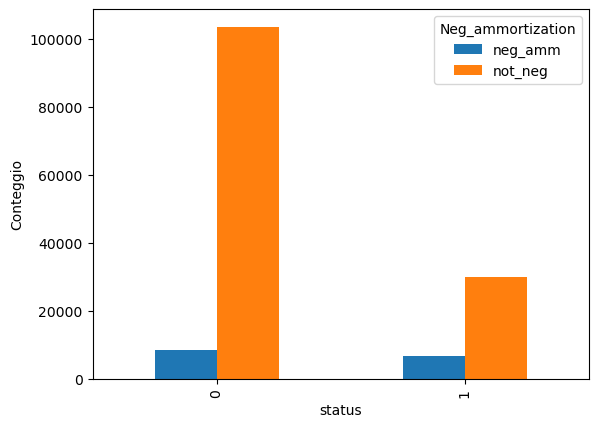

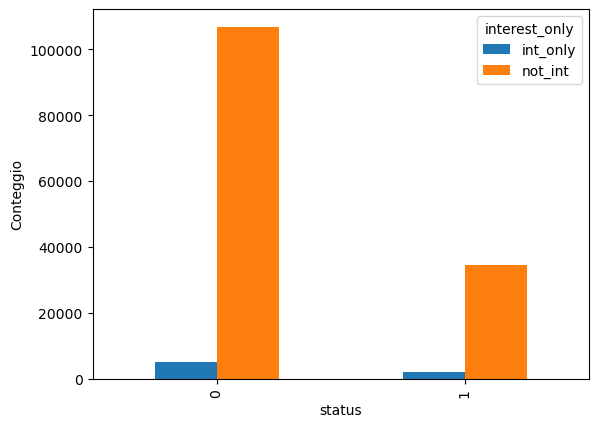

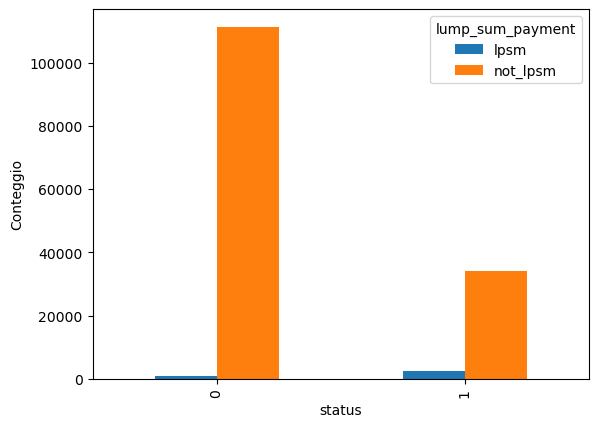

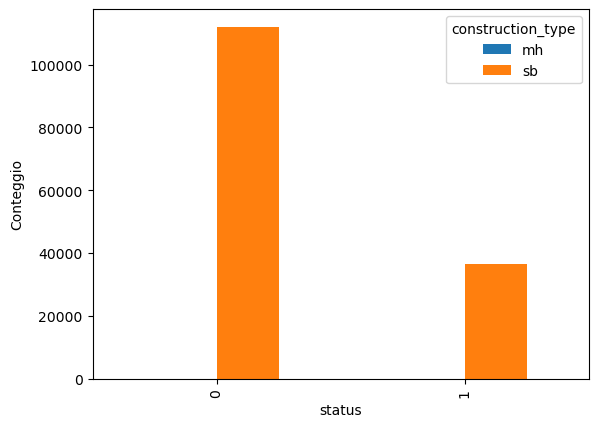

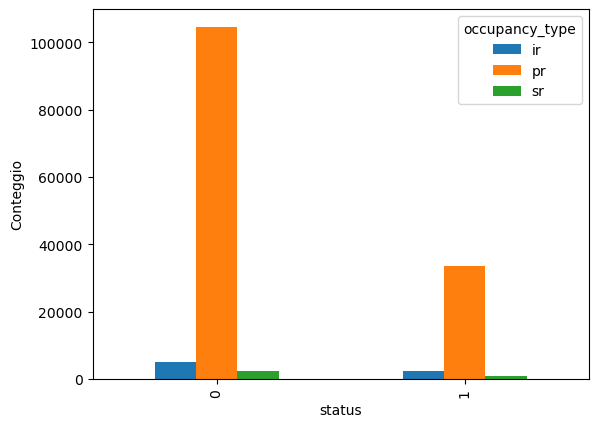

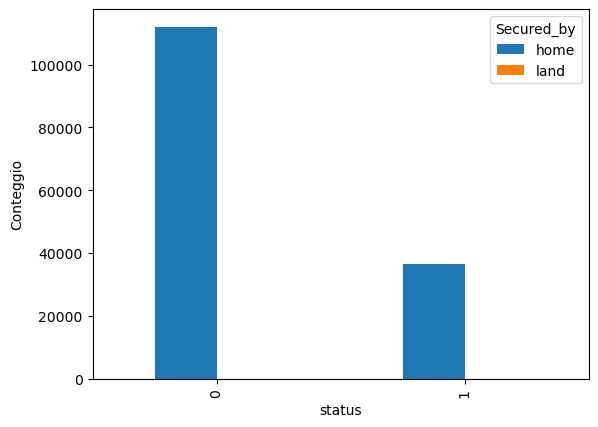

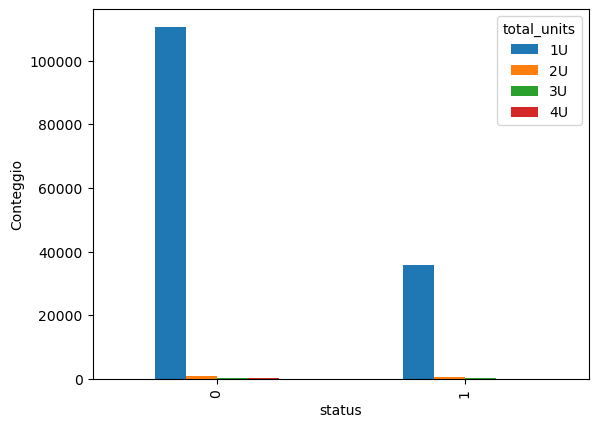

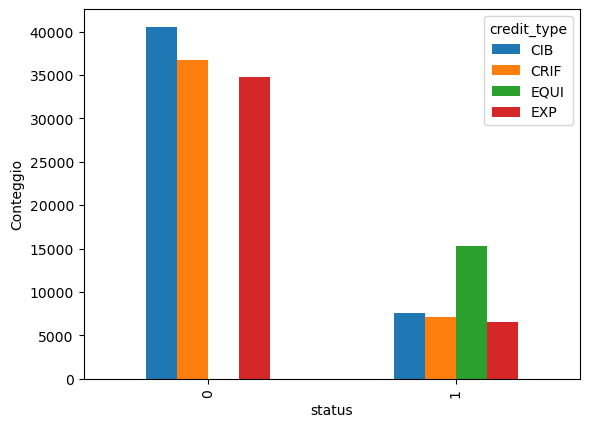

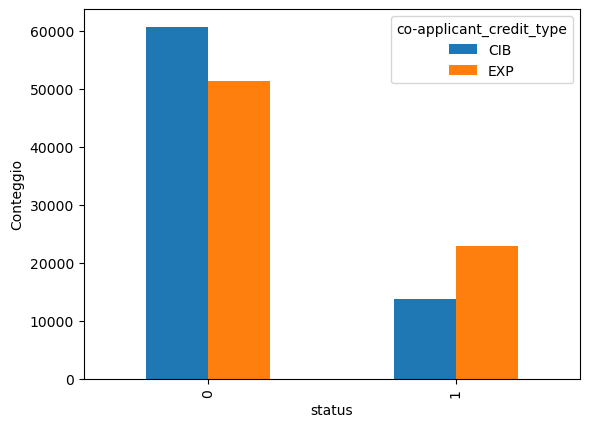

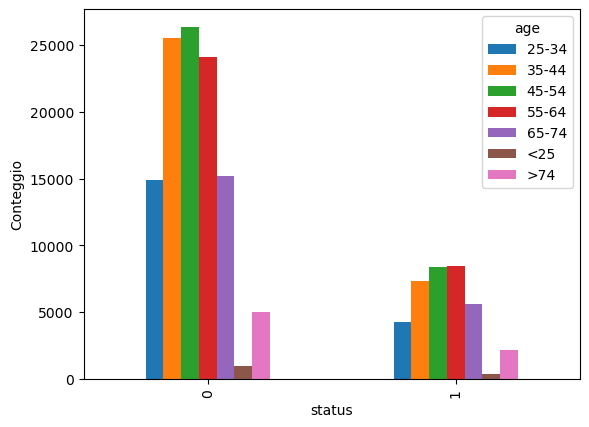

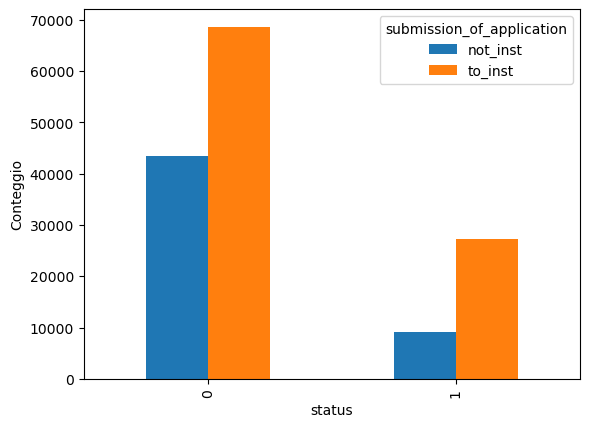

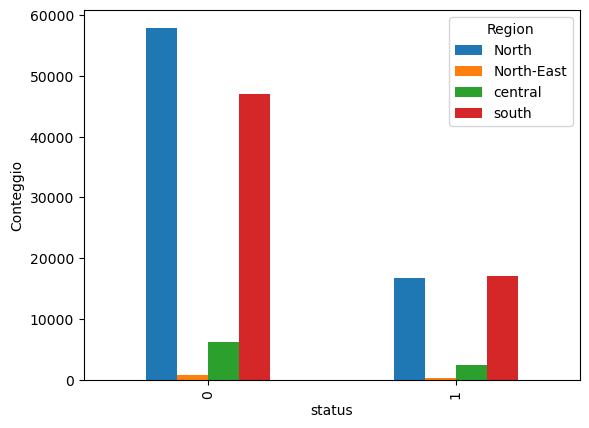

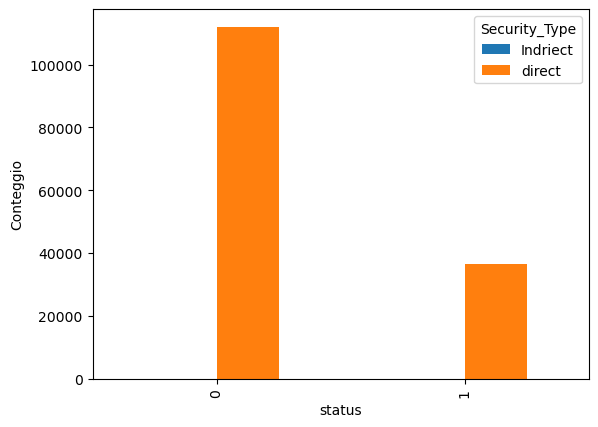

In [177]:
label_data=["Gender","loan_limit","approv_in_adv","loan_type","loan_purpose","Credit_Worthiness","open_credit","business_or_commercial",
             "Neg_ammortization","interest_only","lump_sum_payment","construction_type","occupancy_type","Secured_by","total_units",
             "credit_type","co-applicant_credit_type","age","submission_of_application","Region","Security_Type"]

for col in label_data:
    fig, ax = plt.subplots()
    counts = data.groupby(['Status', col]).size().unstack()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('status')
    ax.set_ylabel('Conteggio')
    # ax.set_title(f'Bar plot of {col} by satisfaction')
    # plt.savefig(f"visualization_{col}.png")
    plt.show()

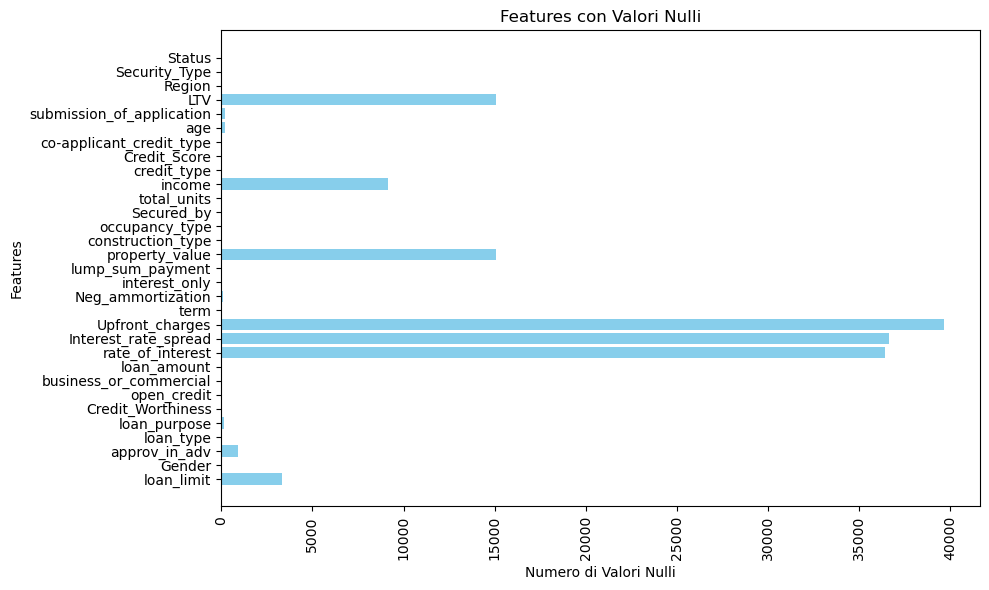

In [178]:
null_counts = data.isnull().sum()

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(null_counts.index, null_counts.values, color='skyblue')
plt.yticks(range(len(null_counts.index)), null_counts.index) 
plt.ylabel('Features')
plt.xlabel('Numero di Valori Nulli')
plt.title('Features con Valori Nulli')
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x per una migliore leggibilità

# Mostra il grafico
plt.tight_layout()

In [179]:
from sklearn.impute import SimpleImputer

colonne=['LTV','income','property_value','Upfront_charges','Interest_rate_spread','rate_of_interest','approv_in_adv','loan_limit','loan_purpose','term','Neg_ammortization','age','submission_of_application']
imputer = SimpleImputer(strategy='most_frequent') 

data[colonne]=imputer.fit_transform(data[colonne])

data.isnull().sum()


loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtype: int64